<a href="https://colab.research.google.com/github/BuretGriffin/WEEK-7-CORE/blob/main/GRIFFINBURET_MORINGA_WEEK7_CORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.  **Defining the Question**

a) Specifying the Question

What are the factors that affect housing prices?

b) Defining the Metric for Success

Results showing the top factors affecting the home prices from the given list in the dataset of 20 factors. These factors are then to be used to accurately predict the sale prices of homes given the predictor variables

c) Understanding the context

The dataset belongs to a real estate company and shows the prices of 21,613 homes given a range of factors. The dataset columns are as below:

Id
price - Price of the house
bedrooms - Number of Bedrooms
bathrooms - Number of Bathrooms
sqft_living - Square feet area of living area
sqft_lot - Square feet area of parking Layout
floors - Number of Floors
waterfront - Whether waterfront is there or not
view - Number of Views
grade - Grades
sqft_above
sqft_basement - Square feet area off basement
yr_built - Year the house is built
yr_renovated - Year the house is renovated
zipcode - zipcode os the house
lat : Latitude of the house
lon : Longitude of the house
sqft_living15
sqft_lot15

 Data Relevance

**2. Reading and cleaning the Data**

In [2]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# uploading the data

home_data = pd.read_csv("Independent Project Week 7 - house_data.csv")

In [4]:
# preview the top five items in the dataset

home_data.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# preview the bottom five items in the dataset

home_data.tail(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
# drop id column as it is irrelevant.
# Additionally, the lat and long columns are irrelevant as it is expected that the zipcode
# will represent those details (No map will be drawn from the analysis)

home_data = home_data.drop(['id','lat', 'long'], 1)

home_data.head(2) # preview the dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639


In [7]:
# check the shape of the dataset

home_data.shape

(21613, 17)

In [8]:
# check for null values

home_data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# describe the dataset
home_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [10]:
# replace the year_built column with a column that represents numeric values, 
# starting with 1900(minimum) as zero and 2015(maximum) with the maximum number

property_age =[] # create a list to hold the results of the calculation

baseline_year = 1900 # specify the baseline year. This is the minimum year as per our analysis above

for year in range(len(home_data)):
  property_age.append(home_data['yr_built'].iloc[year] - baseline_year)

# convert the series into a dataframe to enable concatenation

calculated_year = pd.DataFrame(property_age, columns =['property_age'])

# append the column to the home_data dataframe

home_data = pd.concat([home_data, calculated_year], 1)

# preview the dataset

home_data.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,property_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,55
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,51
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,33
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,65
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,87


In [11]:
# Additionally, replace the renovation year with a column that represents numeric 
# varables on a scale

renovation_age =[] # create a list to hold the results of the calculation

current_year = 2015 # to help specify the years since the last renovation to our current year (2015)
# This is assuming that the analysis is being done in the year 2015

for year in range(len(home_data)):
  if current_year - home_data['yr_renovated'].iloc[year] != 2015:
    renovation_age.append(home_data['yr_renovated'].iloc[year] - home_data['yr_built'].iloc[year])
  else:
    renovation_age.append(0)

# convert the series into a dataframe to enable concatenation

renovated_year = pd.DataFrame(renovation_age, columns =['year_last_renovated'])

# append the column to the home_data dataframe

home_data = pd.concat([home_data, renovated_year], 1)

# preview the dataset

home_data.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,property_age,year_last_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,55,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,51,40
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,33,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,65,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,87,0


In [12]:
# the codes above have worked. Thus, drop the yr_renovated and yr_built columns

home_data = home_data.drop(['yr_built', 'yr_renovated'], 1)

home_data.head(2) # preview the dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,property_age,year_last_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650,55,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639,51,40


In [13]:
# check the number of unique values

columns = home_data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                    'floors', 'waterfront', 'view','condition', 'grade', 'sqft_above',
                    'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15', 'property_age',
                     'year_last_renovated']]

columns.nunique()

price                  3625
bedrooms                 13
bathrooms                30
sqft_living            1038
sqft_lot               9782
floors                    6
waterfront                2
view                      5
condition                 5
grade                    12
sqft_above              946
sqft_basement           306
zipcode                  70
sqft_living15           777
sqft_lot15             8689
property_age            116
year_last_renovated     106
dtype: int64

In [14]:
# Checking whether each column has an appropriate datatype
home_data.dtypes

price                  float64
bedrooms                 int64
bathrooms              float64
sqft_living              int64
sqft_lot                 int64
floors                 float64
waterfront               int64
view                     int64
condition                int64
grade                    int64
sqft_above               int64
sqft_basement            int64
zipcode                  int64
sqft_living15            int64
sqft_lot15               int64
property_age             int64
year_last_renovated      int64
dtype: object

**3. Univariate Analysis**

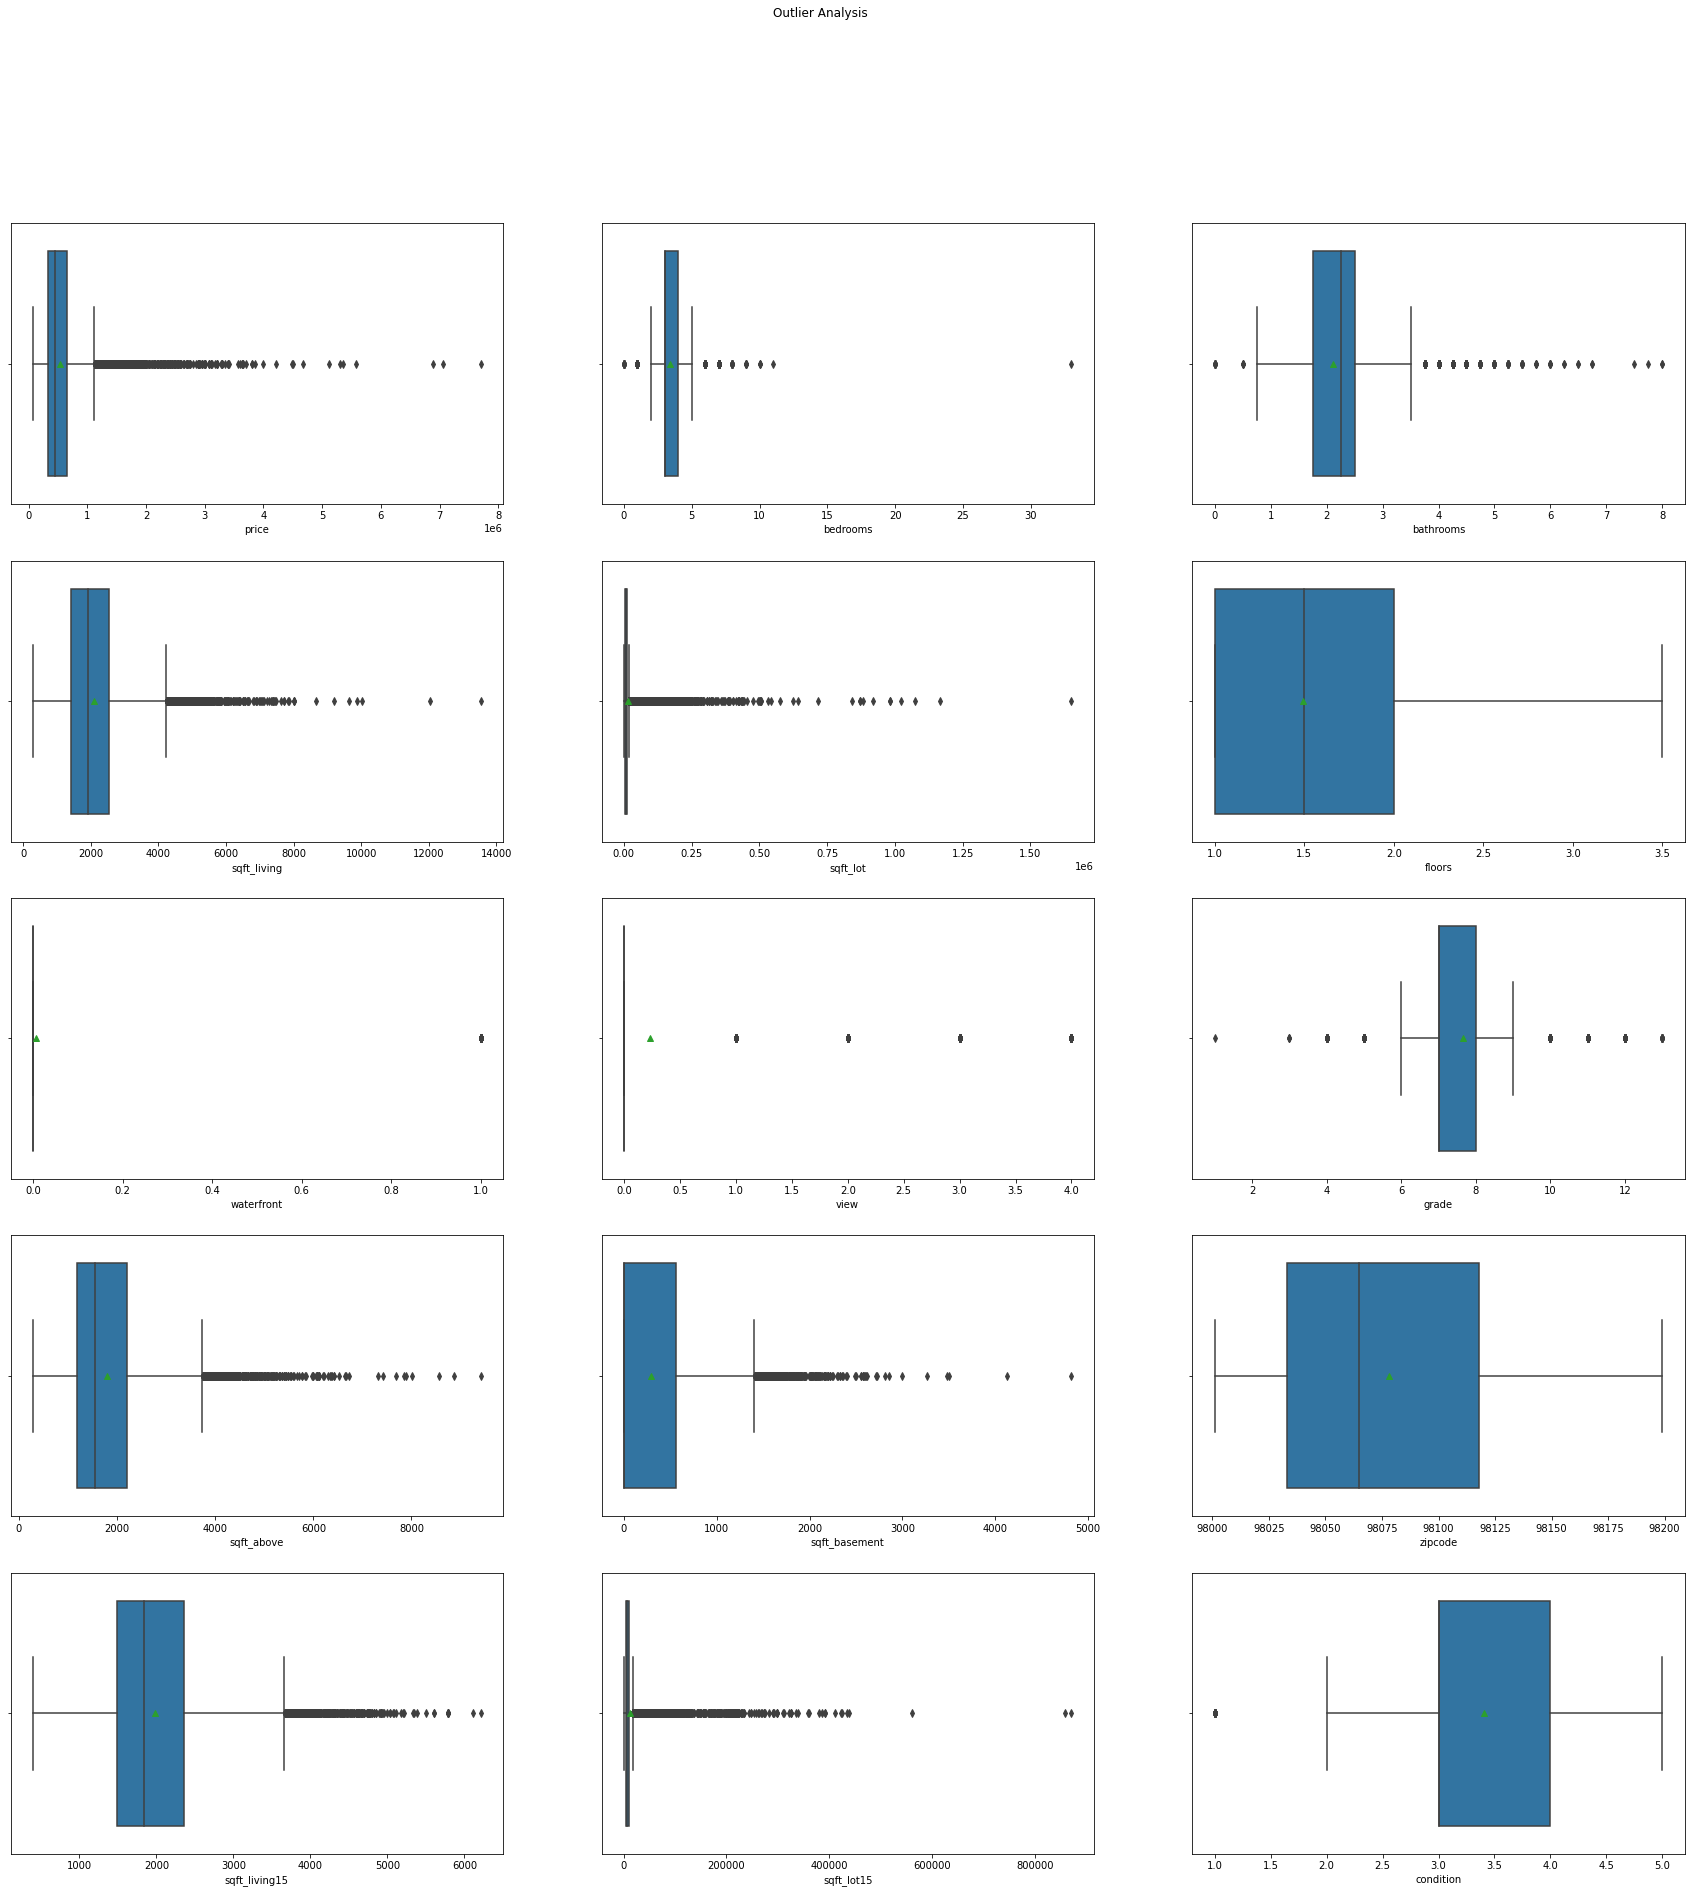

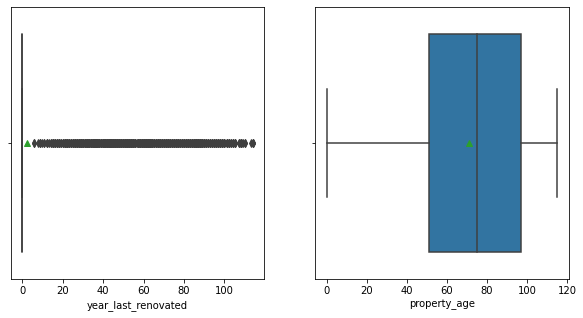

In [15]:
# plotting boxplots to check for outliers

fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9), (ax10,ax11,ax12), (ax13,ax14,ax15)) = plt.subplots(5,3, figsize = (30,30))
fig.suptitle('Outlier Analysis')
sns.boxplot(x = home_data['price'], ax= ax1, showmeans = True)
sns.boxplot(x = home_data['bedrooms'], ax=ax2, showmeans =True)
sns.boxplot(x = home_data['bathrooms'], ax=ax3, showmeans =True)
sns.boxplot(x = home_data['sqft_living'], ax=ax4, showmeans =True)
sns.boxplot(x = home_data['sqft_lot'], ax=ax5, showmeans =True)
sns.boxplot(x = home_data['floors'], ax=ax6, showmeans =True)
sns.boxplot(x = home_data['waterfront'], ax=ax7, showmeans =True)
sns.boxplot(x = home_data['view'], ax=ax8, showmeans =True)
sns.boxplot(x = home_data['grade'], ax=ax9, showmeans =True)
sns.boxplot(x = home_data['sqft_above'], ax=ax10, showmeans =True)
sns.boxplot(x = home_data['sqft_basement'], ax=ax11, showmeans =True)
sns.boxplot(x = home_data['zipcode'], ax=ax12, showmeans =True)
sns.boxplot(x = home_data['sqft_living15'], ax=ax13, showmeans =True)
sns.boxplot(x = home_data['sqft_lot15'], ax=ax14, showmeans =True)
sns.boxplot(x = home_data['condition'], ax=ax15, showmeans =True)

fig, (ax16,ax17) = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(x = home_data['year_last_renovated'], ax=ax16, showmeans =True)
sns.boxplot(x = home_data['property_age'], ax=ax17, showmeans =True)
plt.show()

The dataset shows outliers in quite a number of the fields. However, without domain knowledge it would be impossible to delete these outliers, as doing so may result in bias or result in inability to predict for example the prices of homes that are expensively priced.

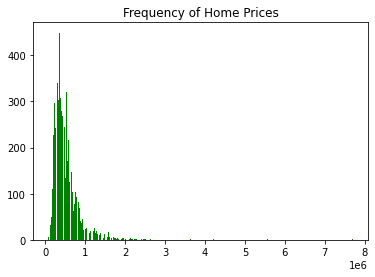

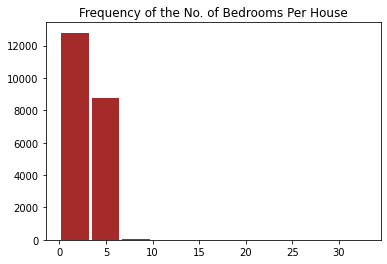

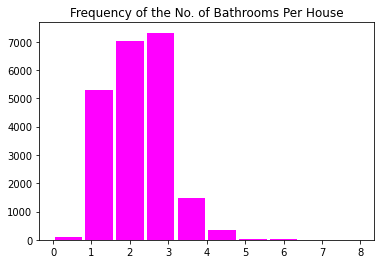

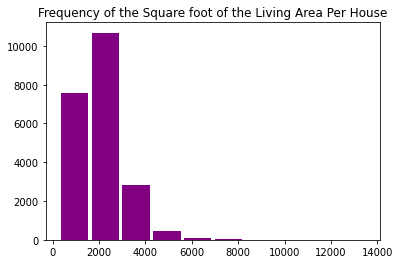

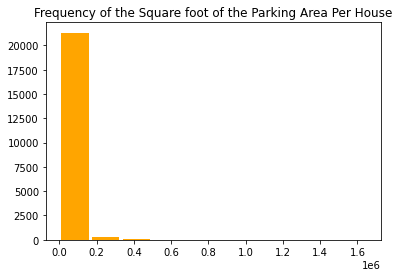

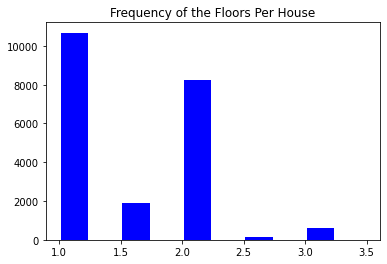

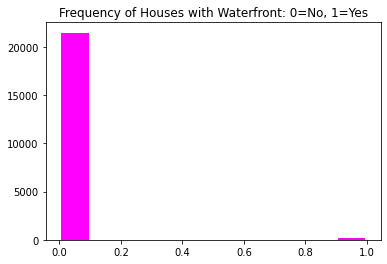

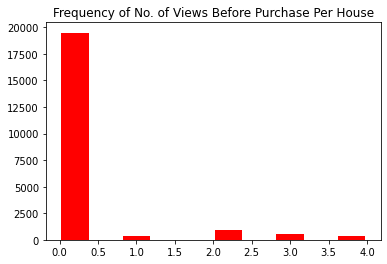

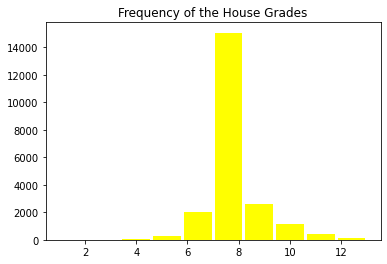

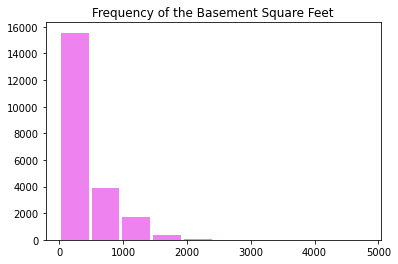

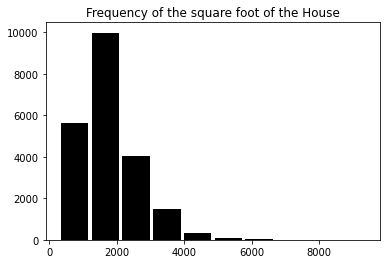

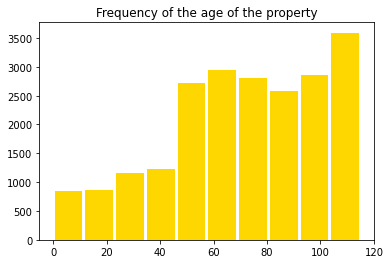

In [16]:
# Plotting histograms to see the distribution of values within the dataset

plt.hist(home_data['price'], bins = 1000, rwidth = 0.9, color = "green")
plt.title('Frequency of Home Prices')
plt.show()

plt.hist(home_data['bedrooms'], rwidth = 0.9, color = "brown")
plt.title('Frequency of the No. of Bedrooms Per House')
plt.show()

plt.hist(home_data['bathrooms'], rwidth = 0.9, color = "magenta")
plt.title('Frequency of the No. of Bathrooms Per House')
plt.show()

plt.hist(home_data['sqft_living'], rwidth = 0.9, color = "purple")
plt.title('Frequency of the Square foot of the Living Area Per House')
plt.show()

plt.hist(home_data['sqft_lot'], rwidth = 0.9, color = "orange")
plt.title('Frequency of the Square foot of the Parking Area Per House')
plt.show()

plt.hist(home_data['floors'], rwidth = 0.9, color = "blue")
plt.title('Frequency of the Floors Per House')
plt.show()
 
plt.hist(home_data['waterfront'], rwidth = 0.9, color = "magenta")
plt.title('Frequency of Houses with Waterfront: 0=No, 1=Yes')
plt.show()

plt.hist(home_data['view'], rwidth = 0.9, color = "red")
plt.title('Frequency of No. of Views Before Purchase Per House')
plt.show()

plt.hist(home_data['grade'], rwidth = 0.9, color = "yellow")
plt.title('Frequency of the House Grades')
plt.show()

plt.hist(home_data['sqft_basement'], rwidth = 0.9, color = "violet")
plt.title('Frequency of the Basement Square Feet')
plt.show()

plt.hist(home_data['sqft_above'], rwidth = 0.9, color = "black")
plt.title('Frequency of the square foot of the House')
plt.show()

plt.hist(home_data['property_age'], rwidth = 0.9, color = "gold")
plt.title('Frequency of the age of the property')
plt.show()

The data in the respective columns in the dataset is skewed to the right apart from the age of the property, which is skewed to the left, showing that most of the property on offer is quite aged,

**4. Bivariate Analysis**

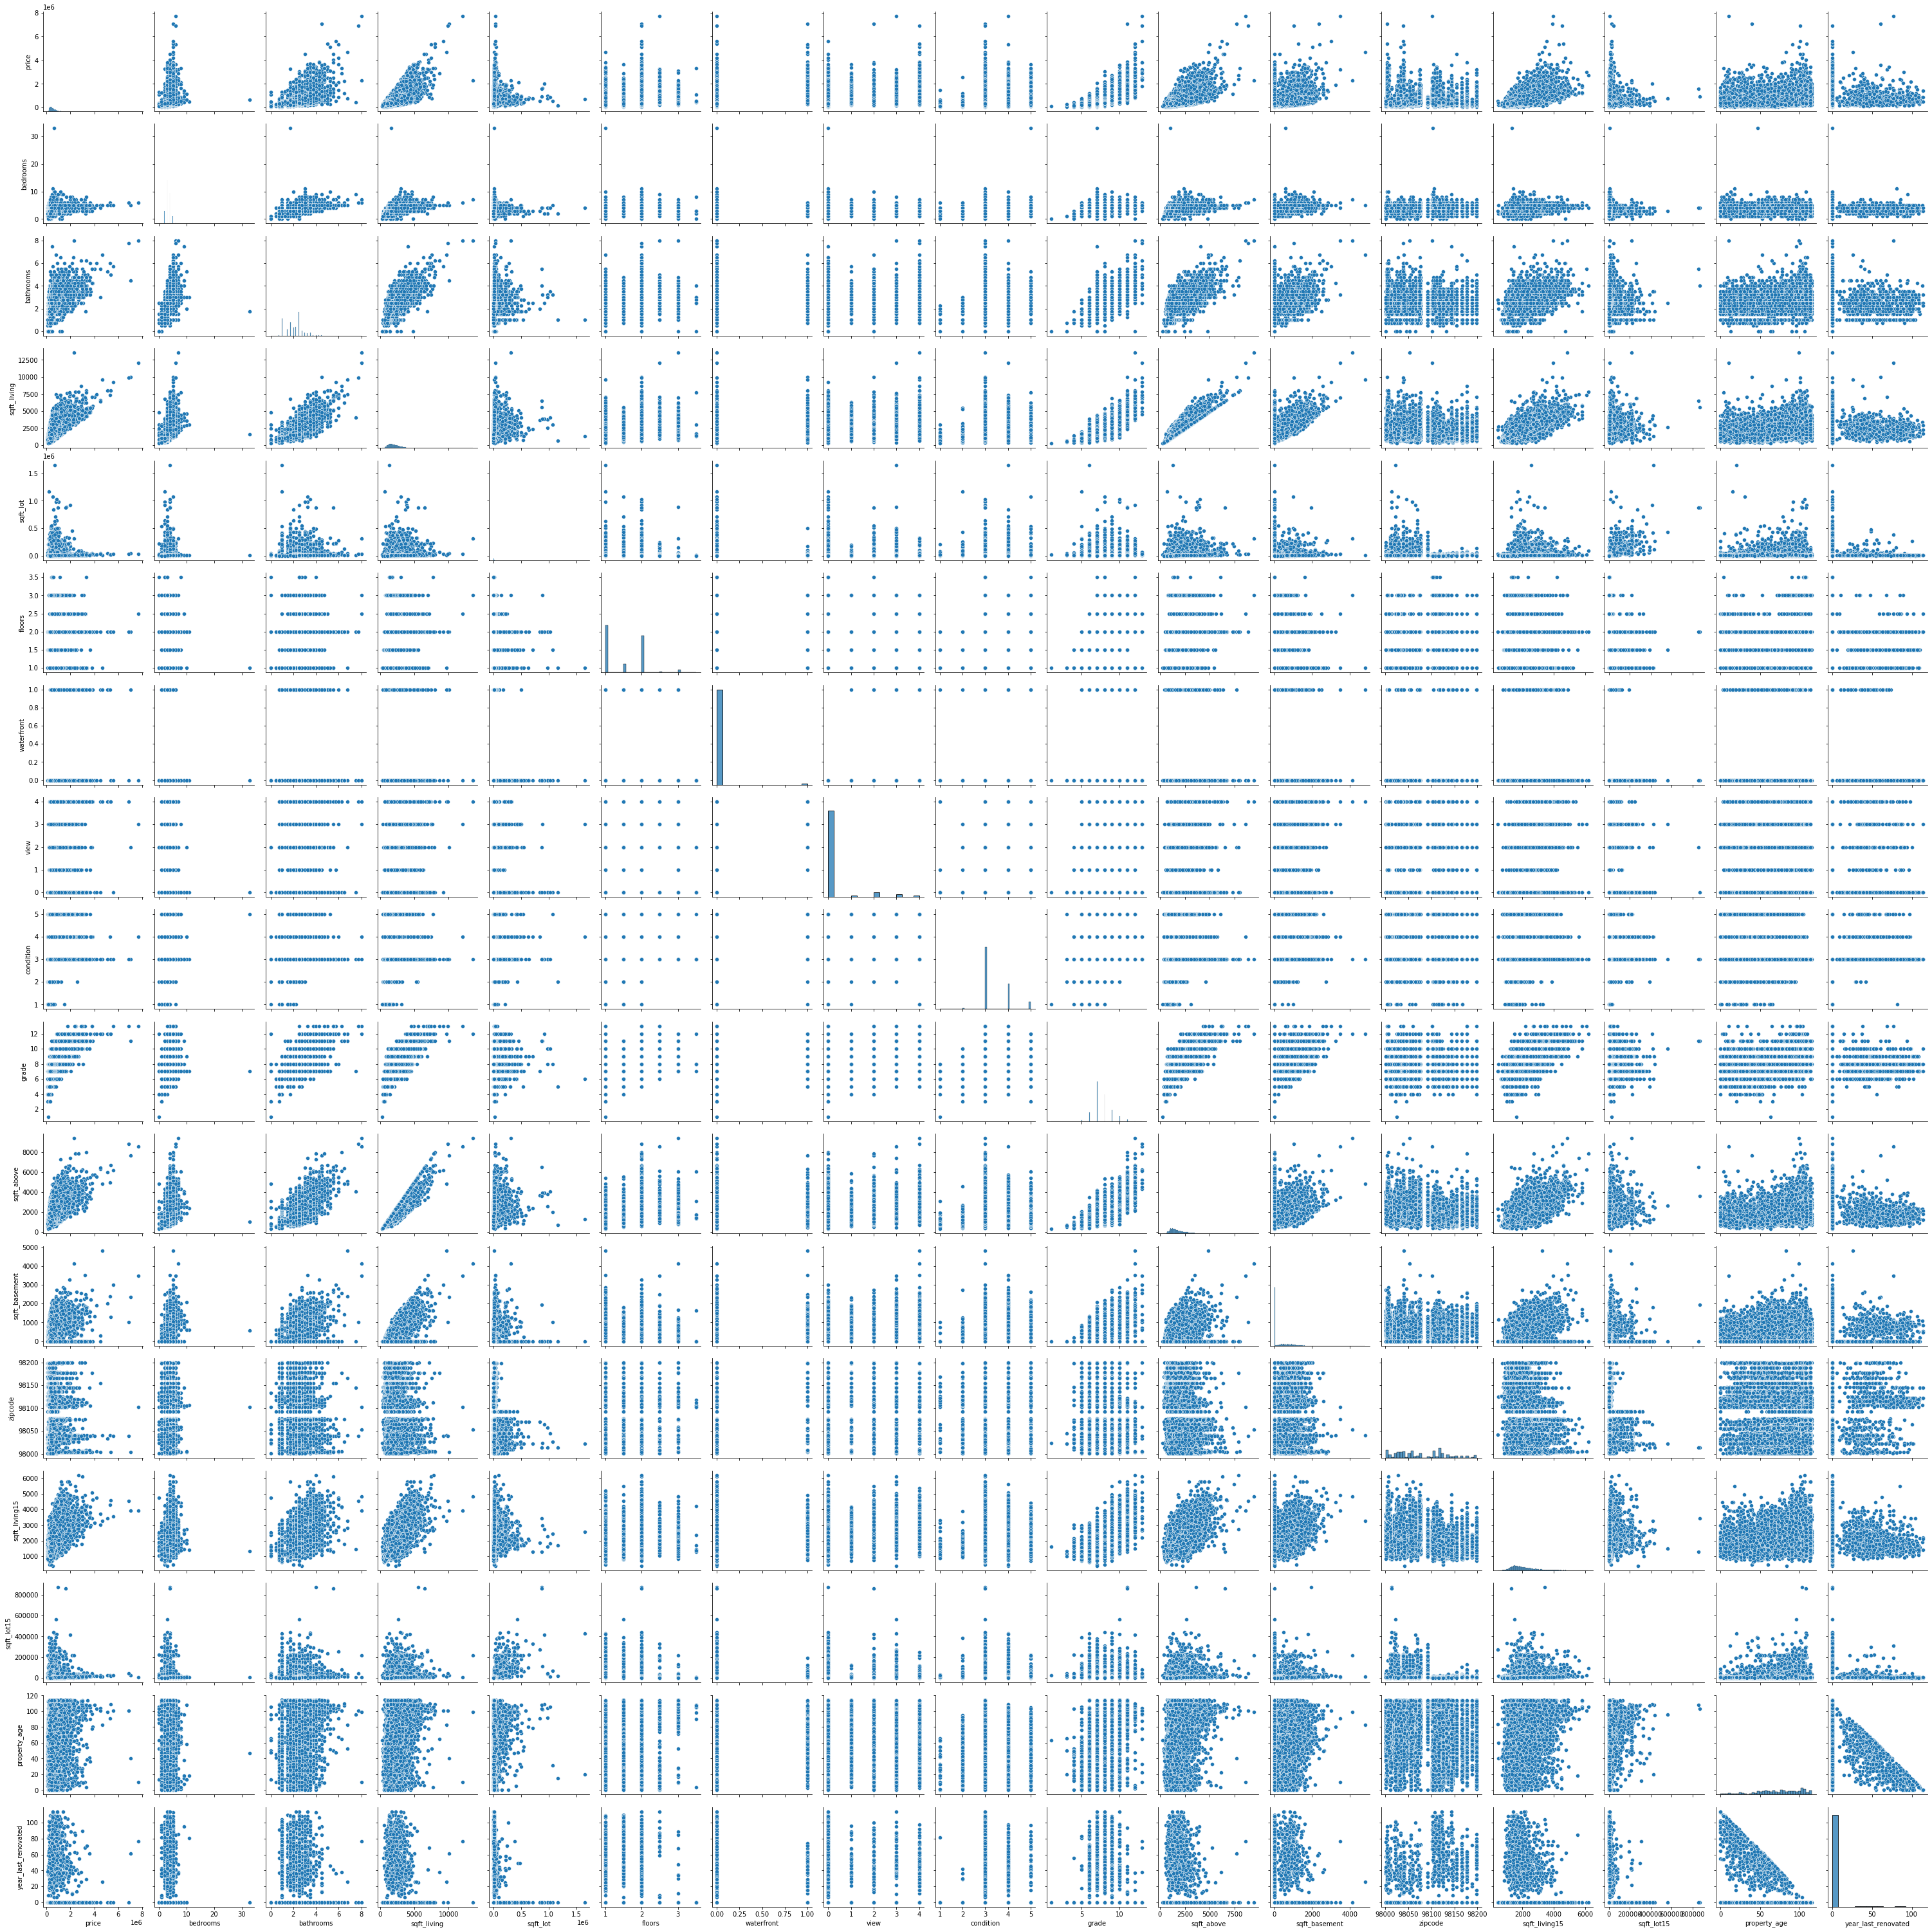

In [17]:
sns.pairplot(home_data)
plt.show()

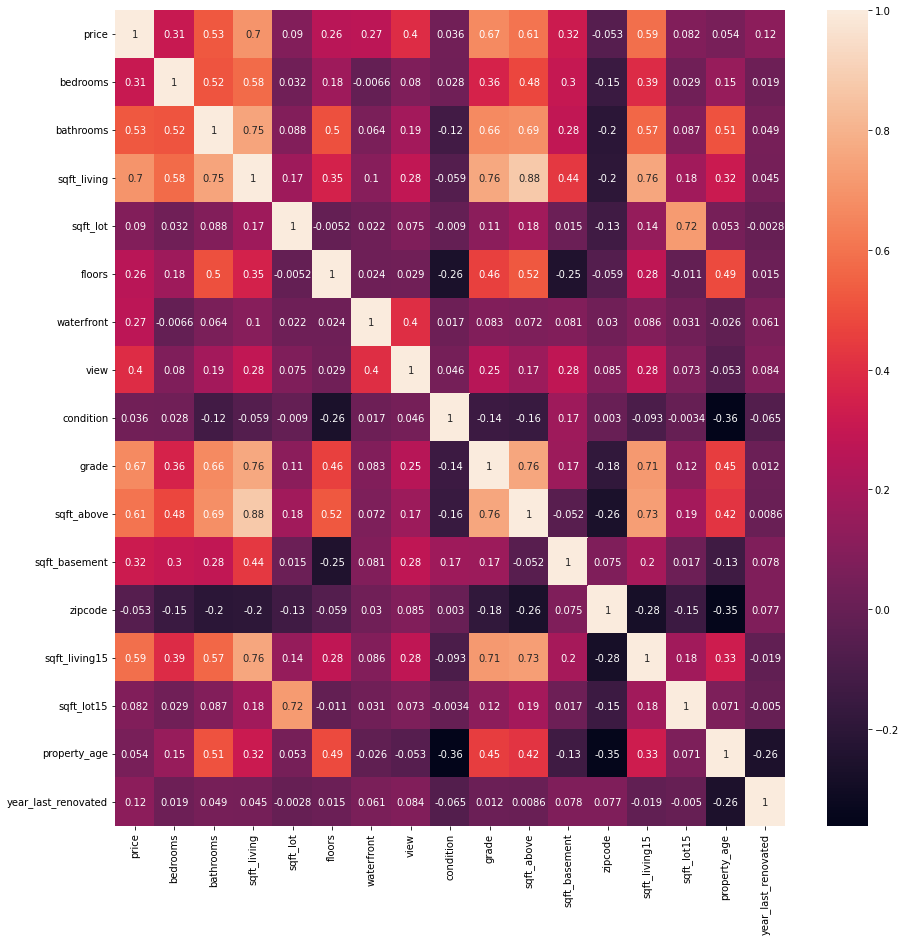

In [18]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(home_data.corr(),annot=True)
plt.show()

The highest correlation in our dataset is 0.87 between the square feet of the house and the square feet of the living area, showing that the greater the sqaure feet of the living area the greater the square feet of the entire house. Thereafter, the next highest correlation is 0.76 between the grade of the house and the square feet of the living area, showing that the g=higher the grade of the house the greater the square feet of the living area.

The lowest correlation of -0.38 is between the zipcode and the property age, showing a weak negative cot=rrelation between these two features

**5. Multiple Linear Regression**

**a) Performing Multiple Linear Regression**

In [19]:
# preview the dataset.

home_data.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,property_age,year_last_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650,55,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639,51,40


In [20]:
# create a copy of the data to perform multiple linear regression. This is because the original dataframe will be necessary to test for multicollinearity

regression = home_data

regression.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,property_age,year_last_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650,55,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639,51,40


In [21]:
# scale the dataset:
# Our univariate analysis above shows that most of our dataset is right skewed, i.e. not normally distributed. As such, we may not be able to use
# StandardScaler() to scale our dataset since this is best used when the data distribution is normal. We have the option of using MinMaxScaler and this is normally 
# used as the first scaler choice to transform a feature, as it will preserve the shape of the dataset (no distortion).
# Our univariate analysis above also showed the presence of outliers in many of the columns, since these outliers were not deleted before starting this analysis
# (as they are valid for the analysis), the best scaler to use would be RobustScaler().

# If scaler is used before train_test_split, data leakage will happen. I thus use scaler after train_test_split

from pandas import DataFrame
from sklearn.preprocessing import RobustScaler # import the library

# create list of column names to use  as we transform the array back into a dataframe. If we don't create this list, the array will be converted back into a dataframe
# but without column headers.

col_names = list(regression.columns.values)

# perform a robust scaler transform of the dataset
trans = RobustScaler()
regression= trans.fit_transform(regression)

# convert the array back to a dataframe

regression = DataFrame(regression, columns=col_names) # call the column headers so as the dataframe comes out with the headers

# describe the dataset
home_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,property_age,year_last_renovated
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,98077.939805,1986.552492,12768.455652,71.005136,2.380882
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,53.505026,685.391304,27304.179631,29.373411,12.359528
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,98001.000000,399.000000,651.000000,0.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,1490.000000,5100.000000,51.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,1840.000000,7620.000000,75.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,98118.000000,2360.000000,10083.000000,97.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,6210.000000,871200.000000,115.000000,114.000000


In [22]:
# After initially performing robust scaling and thereafter running multiple linear regression, I couldn't predict due to the presence of null values. I got the following error:
# "ValueError: Input contains NaN, infinity or a value too large for dtype('float64')." Therefore, I included a step for checking for null values immediately after robust scaling (and before splitting 
# and training the dataset). I got two null values after robust scaling as shown below:

regression.isnull().sum()

price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront             0
view                   0
condition              0
grade                  0
sqft_above             0
sqft_basement          0
zipcode                0
sqft_living15          0
sqft_lot15             0
property_age           0
year_last_renovated    0
dtype: int64

In [23]:
# since they are only two values, I chose to drop them from my dataset

regression = regression.dropna()

regression.isnull().sum() # check that the null values have been dropped

price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront             0
view                   0
condition              0
grade                  0
sqft_above             0
sqft_basement          0
zipcode                0
sqft_living15          0
sqft_lot15             0
property_age           0
year_last_renovated    0
dtype: int64

In [24]:
# Preparing the Data. In this case I will use all the features in the dataset to predict home prices

X = regression.drop(['price'], 1)
y = regression['price']

# Dividing our data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
# Training the Algorithm

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
# check the coefficients
# 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-0.117142
bathrooms,0.103621
sqft_living,0.298502
sqft_lot,0.000466
floors,0.088793
waterfront,1.869376
view,0.134310
condition,0.058988
grade,0.364198
sqft_above,0.248611


In [27]:
# Making Predictions
# ---
# To make pre-dictions on the test data, execute the following
# ---
# 
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
17384,-0.473611,-0.487292
722,3.497911,3.236612
2680,0.347005,0.179206
18754,0.561833,0.352679
14554,1.021514,1.245071
...,...,...
5427,1.219625,1.518059
16547,-0.354434,-0.504933
4585,-0.247794,-0.496076
17762,-0.464324,-0.674265


In [28]:
# Evaluating the Algorithm

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred, sample_weight=None, multioutput='uniform_average'))

Mean Absolute Error: 0.4209739300197761
Mean Squared Error: 0.4046665439718624
Root Mean Squared Error: 0.6361340613203025
R2 Score: 0.6453662763271171


**b) Multicollinearity: VIF test**

In [29]:
# preview the dataset

home_data.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,property_age,year_last_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650,55,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639,51,40


In [30]:
# Drop the price column, so as to check for multicollinearity on the independent variables

correlations = home_data.drop(['price'], 1)

correlations.head(2) # preview the dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,property_age,year_last_renovated
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650,55,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639,51,40


In [31]:
# check the correlations

correlations.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,property_age,year_last_renovated
bedrooms,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,-0.152668,0.391638,0.029244,0.154178,0.019334
bathrooms,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,-0.203866,0.568634,0.087175,0.506019,0.049395
sqft_living,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,-0.199430,0.756420,0.183286,0.318049,0.045311
sqft_lot,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,-0.129574,0.144608,0.718557,0.053080,-0.002829
floors,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,-0.059121,0.279885,-0.011269,0.489319,0.015068
waterfront,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,0.030285,0.086463,0.030703,-0.026161,0.060922
view,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.084827,0.280439,0.072575,-0.053440,0.084434
condition,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,0.003026,-0.092824,-0.003406,-0.361417,-0.064873
grade,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,-0.184862,0.713202,0.119248,0.446963,0.011751
sqft_above,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,-0.261190,0.731870,0.194050,0.423898,0.008551


Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. VIF is preferred as it can show the correlation of a variable with a group of other variables

In [32]:
# calculating the VIF score

from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                feature        VIF
0              bedrooms   1.649461
1             bathrooms   3.364034
2           sqft_living  24.574111
3              sqft_lot   2.091084
4                floors   1.991311
5            waterfront   1.200497
6                  view   1.418605
7             condition   1.255163
8                 grade   3.255598
9            sqft_above  21.555726
10        sqft_basement   6.942247
11              zipcode   1.307566
12        sqft_living15   2.902563
13           sqft_lot15   2.120726
14         property_age   2.303282
15  year_last_renovated   1.186315


A rule of thumb for interpreting the variance inflation factor is that VIF scores of 1 indicate that the independent variables are not correlated. Between 1 and 5 indicates that they are moderately correlated and greater than 5 indicates high correlation.

From the analysis above, sqft_living and sqft_above have high VIF scores of 28.67 and 28.42. Thereafter, sqft_basement also has a high multicollinearity with a VIF score of 7.92

Since the primary goal of this model is to make predictions, and not necessarily to understand the role of each independent variable in the prediction, I will not make any changes to these variables that have exhibited high multicollinearity, since multicollinearity affects only the co-efficients and p-values, and not the overall prediction.

**c) Multicollinearity: Residuals Plot**

In [33]:
# Create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Describe our residual:
print(pd.DataFrame(residuals).describe())

print('*'*60)

print('residuals mean:', residuals.mean())

             price
count  4323.000000
mean      0.016628
std       0.635990
min      -9.887959
25%      -0.265356
50%       0.038166
75%       0.344327
max       3.309991
************************************************************
residuals mean: 0.016628246476535068


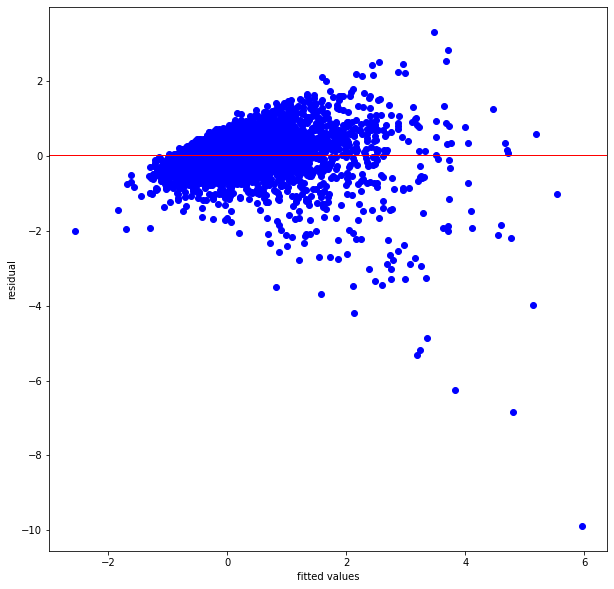

In [34]:
# plotting the residuals plot
fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(y_pred, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [35]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(test_result)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous! (homoskedasticity)')

494.58625492201884
the variances are homogeneous! (homoskedasticity)


**6. Quantile Regression**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Data with non-constant variance')

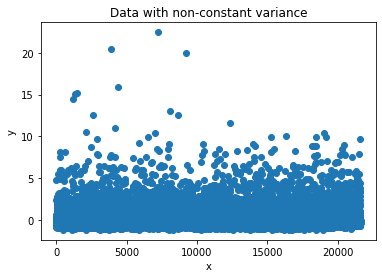

In [36]:
X = regression.drop(['price'],1).index.values.reshape(-1, 1)
y = regression['price'].values.reshape(-1, 1)



plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data with non-constant variance")

In [37]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ X', regression)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:            0.0003560
Model:                       QuantReg   Bandwidth:                      0.1302
Method:                 Least Squares   Sparsity:                        1.771
Date:                Mon, 13 Jun 2022   No. Observations:                21613
Time:                        18:18:25   Df Residuals:                    21611
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0360      0.012     -2.986      0.003      -0.060      -0.012
X           3.498e-06   9.66e-07      3.622      0.000    1.61e-06    5.39e-06

The condition number is large, 2.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.


The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.

In [38]:
# Finding the regression coefficients for the conditioned median, from 0.1 to 0.9 quantile
# 
quantiles = np.arange(0.1,1,0.1) #start, stop, increment by
models = []
params = []

# Build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['X']] + res.conf_int().loc['X'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1  -0.673195  0.000004        0.000003        0.000005
1  0.2  -0.528184  0.000005        0.000004        0.000006
2  0.3  -0.372378  0.000004        0.000003        0.000006
3  0.4  -0.204462  0.000004        0.000002        0.000006
4  0.5  -0.035974  0.000003        0.000002        0.000005
5  0.6   0.166716  0.000004        0.000002        0.000007
6  0.7   0.395699  0.000004        0.000002        0.000007
7  0.8   0.730472  0.000005        0.000001        0.000009
8  0.9   1.257919  0.000009        0.000003        0.000014


The advantage of Quantile Regression is that it allows us to derive a regression line for each quantile in our dataset, thus allowing more accurate predictions. For example, the factors affecting the home prices for homes that have prices in the lower quantiles may be much different than the factors affecting the prices of homes in the higher quantile price ranges.

**7. Lasso Regression**

In [39]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))} 


lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores and MSE
gridlasso.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso R2 score:", gridlasso.score(X_test, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))

# calculating and displaying the coefficients

coeff = pd.DataFrame(home_data.columns) # create a new dataframe to hold and display the coefficients

coeff['Coefficient Estimate'] = Series(gridlasso.best_estimator_.coef_)

coeff # display the dataframe

lasso best parameters: {'alpha': 0.1}
lasso R2 score: 0.00012622520085903144
lasso MSE: 1.360168467454227


NameError: ignored

The Lasso regression has dealt with multicollinearity by reducing the coefficients of some of the correlated variables to Zero. However, this has resulted in a much lower R2 score as compared to the Multiple Linear Regression R2 score. The Lasso R2 score is 55.82% while that of the Multiple Linear Regression is 64.51%

**8. Ridge Regression**

In [40]:
from sklearn.linear_model import Ridge # all the other necessary libraries have already been imported in the code cells above

ridge = linear_model.Ridge() 
gridridge = GridSearchCV(ridge, parameters, scoring ='r2', cv=10) 

# Fitting models and print the best parameters, R-squared scores and MSE
gridridge.fit(X_train, y_train) 
print("ridge best parameters:", gridridge.best_params_) 
print("ridge R2 score:", gridridge.score(X_test, y_test))
print("ridge MSE:", mean_squared_error(y_test, gridridge.predict(X_test)))

# calculating and displaying the coefficients

coeff = pd.DataFrame(home_data.columns) # create a new dataframe to hold and display the coefficients

coeff['Coefficient Estimate'] = Series(gridridge.best_estimator_.coef_)

coeff # display the dataframe

ridge best parameters: {'alpha': 24.0}
ridge R2 score: 0.00012587009668063587
ridge MSE: 1.3601689505167076


NameError: ignored

Ridge regression gives a slightly better R2 score of 64.74% (as compared to multiple linear regression that gave an r2 score of 64.51%

**9. Elastic Net Regression**

In [41]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. However, since the data was already normalized with Robust Scaler
# above, we will not normalize the data again.
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.

from sklearn.linear_model import ElasticNet

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='r2',n_jobs=1,refit=True,cv=10)

# NB: can also use scoring of 'neg_mean_squared_error'

# fit the model and display the best parameters and the best results we can get with that setup.

search.fit(X,y)
print(search.best_params_)
abs(search.best_score_)

{'alpha': 0.0001, 'l1_ratio': 0.2}


0.003106587147602391

In [42]:
# fitting the model and displaying the best parameters and the best results we can get with that setup.
# Here, we use the best parameters from our model from the code cell above, an alpha of 1e-05 and an l1 ratio of 0.8
# The model below calculates the MSE though we used an r2 scoring above. As such, the MSE value output can be ignored since it's not
# comparable to the r2 scoring above.

elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X,y)
elastic_net_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(elastic_net_model)

1.2921310201958796


In [43]:
# print
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

AttributeError: ignored

The elastic net model gives the best r2 score at 64.88% while at the same time dealing with multicollinearity. The predictive variables in the elastic net regression however remain the same number as the variables in multiple linear regression (i.e it retains all 16 variables).

In terms of prediction, the best model to use would thus be the elastic net regression equation

**10. Suggestions to improve the model**

With the highest r2 score attainable standing at 64.88%, there is definately room to improve the model. We can check whether there are additional variables that could be included that would improve the predictability of the model e.g. including economic status per year analyzed. The economic growth per year would determine the prices buyers would be prepared to pay for a home, with home prices increasing in good years and reducing in bad years. As such, we could explore the possibility of including economic growth forecasts in our model.

Another analysis that could be done is analysis could be done to improve model predictability is to regress according to zip codes. The analysis done above has predicted home prices across the country using the same regression equation. Splitting the regression to focus on each zip code could potentially increase the predictive power of the regression variables.